# t-SNE 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

'pip3' 不是內部或外部命令、可執行的程式或批次檔。
'pip3' 不是內部或外部命令、可執行的程式或批次檔。


載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets

%matplotlib inline

載入 digits (4個數字) 資料集

In [3]:
digits = datasets.load_digits(n_class=4)
X = digits.data
y = digits.target

設定 模型 估計參數

In [4]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

資料建模 並 視覺化 結果

Computing t-SNE embedding
0.9107913374900818, 0.6490652561187744

0.36704155802726746, 0.8991925120353699

0.29317331314086914, 0.7343215346336365

0.5723480582237244, 0.10364196449518204

0.9262130260467529, 0.6931176781654358

0.47199177742004395, 0.8819808959960938

0.19169169664382935, 0.4643014669418335

0.4438309967517853, 0.11928530782461166

0.7949109673500061, 0.5979446172714233

0.4513101577758789, 0.834000825881958

0.18350307643413544, 0.40845972299575806

0.3893756568431854, 0.20054671168327332

0.8222968578338623, 0.4859578609466553

0.7773001790046692, 0.5518102049827576

0.4567027986049652, 0.8645783066749573

0.4749965965747833, 0.1768733710050583

0.43886280059814453, 0.8610259294509888

0.9484957456588745, 0.6446533203125

0.9049148559570312, 0.565814733505249

0.2942129671573639, 0.7121652364730835

0.30465129017829895, 0.730213463306427

0.30920496582984924, 0.7299849987030029

0.7819024324417114, 0.6020500659942627

0.44603079557418823, 0.8512058258056641

0.29547

0.8450409770011902, 0.606802225112915

0.4292841851711273, 0.8624488711357117

0.5081140995025635, 0.04498477652668953

0.22514328360557556, 0.43624407052993774

0.34759658575057983, 0.9412267804145813

0.4109991490840912, 0.13776573538780212

0.3364737033843994, 0.9561832547187805

0.5368836522102356, 0.13712669909000397

0.3120250701904297, 0.9686501622200012

0.48293548822402954, 0.05856556445360184

0.2893000543117523, 0.9771566390991211

0.8404104709625244, 0.6225550174713135

0.5096608996391296, 0.021739179268479347

0.29346027970314026, 0.990404486656189

0.2748791575431824, 0.43017786741256714

0.24296791851520538, 0.4348410964012146

0.2590493857860565, 0.4321490228176117

0.7598769664764404, 0.5731379985809326

0.948908805847168, 0.6031152009963989

0.46998870372772217, 0.7771947383880615

0.1055685356259346, 0.44412297010421753

0.5825331211090088, 0.09063062816858292

0.9100984334945679, 0.5562389492988586

0.4833206236362457, 0.7824188470840454

0.08524397760629654, 0.4566

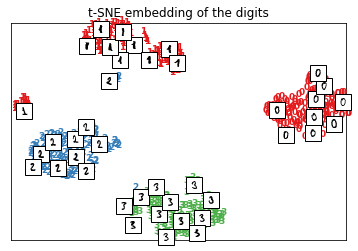

In [8]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        print(f'{X[i, 0]}, {X[i, 1]}\n')   
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()